# Bank Personal Loan Modelling 
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

There are no empty or (NaN) values in the dataset. The dataset has a mix of numerical and categorical attributes, but all categorical data are represented with numbers. Moreover, Some of the predictor variables are heavily skewed (long - tailed), making the data pre-processing an interesting yet not too challenging aspect of the data.

Attribute Information:

1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : #years of professional experience
4. Income : Annual income of the customer in dollar
5. ZIPCode : Home Address ZIP code
6. Family : Family size of the customer
7. CCAvg : Avg. spending on credit cards per month in dollar
8. Education : Education Level
    1: Undergrad
    2: Graduate
    3: Advanced/Professional
9. Mortgage : Value of house mortgage if any in dollar
10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?
11. Securities Account : Does the customer have a securities account with the bank?
12. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
13. Online : Does the customer use internet banking facilities?
14. Credit card : Does the customer use a credit card issued by

## Problem Statement
##### Did this customer accept the personal loan offered in the last campaign?
###### Classifiaction ploblem

In [1]:
# Importing required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data 
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
# Just reviewing the first 5 rows of data
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape
# This will give the total rows and columns

(5000, 14)

## -------------------------------- Data Preperation ------------------------------------

######  Since 'ID' and 'Zip Code' is likely not have any importance. Hence We will drop these two columns.

In [5]:
df.drop(["ID","ZIP Code"],axis= 1,inplace = True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [6]:
# Ckeching missing value is the data set 
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Descriptive Analysis of Data
df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# Here we can see in "Experience" column that min value of experience is in negative. 
# As we know that Experience can not be in negative.
# Hence we have to change negative values into "zero" or "mode" or "mean".  

In [9]:
# Finding the type of data. we can also do this with "df.dtypes"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


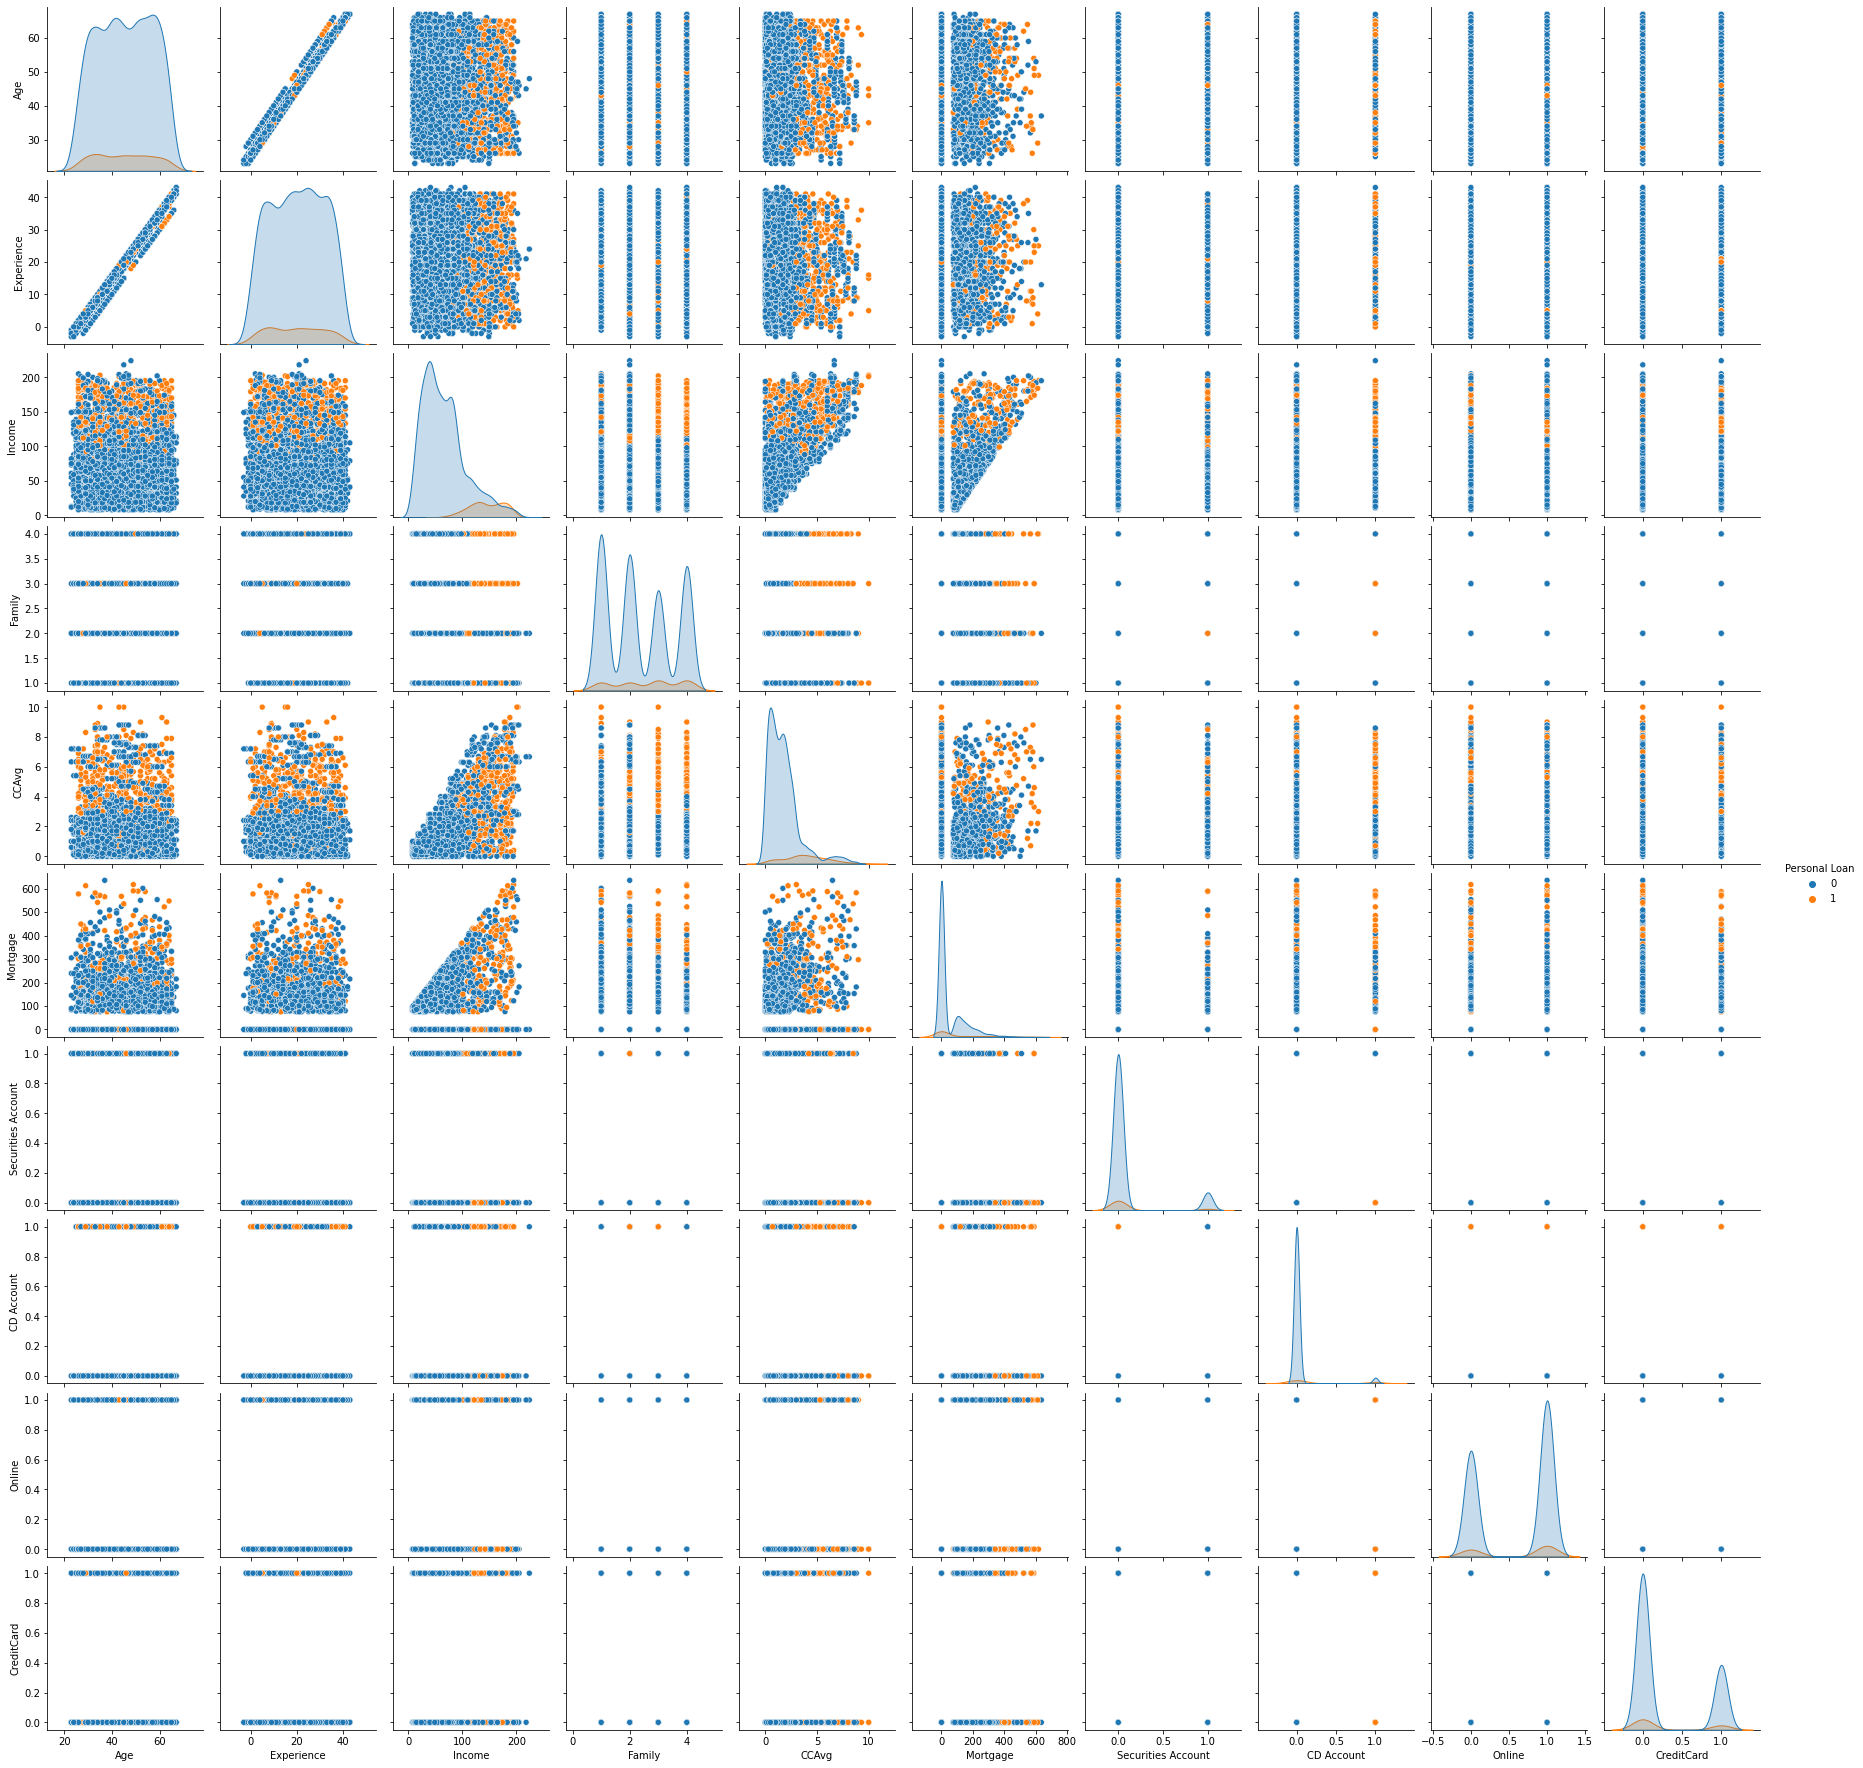

In [11]:
# Lets visulaize the distribution of data set.
sns.pairplot(df,diag_kind='kde',hue='Personal Loan')

In [12]:
# Since here education is a categorical data. In data set there are three values 1,2,3.
# For computation, we are going to assign 0,1 for each type of eduaction.
# For this first we replce 1,2,3 with "Undergrad","Graduate","Advanced_Professional".
# Now with one hot encoding we change "Education" to 0 and 1.

df["Education"] = df["Education"].replace({1:"Undergrad",2:"Graduate",3: "Advanced_Professional"})

In [12]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,Advanced_Professional,0,0,0,0,1,0
4996,30,4,15,4,0.4,Undergrad,85,0,0,0,1,0
4997,63,39,24,2,0.3,Advanced_Professional,0,0,0,0,0,0
4998,65,40,49,3,0.5,Graduate,0,0,0,0,1,0


In [13]:
df = pd.get_dummies(df,columns=["Education"])
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
0,25,1,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [14]:
#df

In [15]:
df.shape

(5000, 14)

In [16]:
# Since in data set there are many variables, Hence for easy understanding of data set we can take transpose of data. 


#np.transpose(df)

In [17]:
# Ploblem with our data -
# 1. In "Experience" column, there are negative values bcz min value is -3.
# 2. Check correlation between the columns. If there will be any strong relation we can drop some columns.
# for this we will use "Heat map" for correlation.

### Finding negative values in "Experience" column

In [19]:
# checking the element is < 0 
df[df["Experience"] < 0].count()


Age                                52
Experience                         52
Income                             52
Family                             52
CCAvg                              52
Mortgage                           52
Personal Loan                      52
Securities Account                 52
CD Account                         52
Online                             52
CreditCard                         52
Education_Advanced_Professional    52
Education_Graduate                 52
Education_Undergrad                52
dtype: int64

In [20]:
df[df< 0].count()

# There are 52 rows in which negative value present in "Experience" column.

Age                                 0
Experience                         52
Income                              0
Family                              0
CCAvg                               0
Mortgage                            0
Personal Loan                       0
Securities Account                  0
CD Account                          0
Online                              0
CreditCard                          0
Education_Advanced_Professional     0
Education_Graduate                  0
Education_Undergrad                 0
dtype: int64

In [21]:
df.count()

Age                                5000
Experience                         5000
Income                             5000
Family                             5000
CCAvg                              5000
Mortgage                           5000
Personal Loan                      5000
Securities Account                 5000
CD Account                         5000
Online                             5000
CreditCard                         5000
Education_Advanced_Professional    5000
Education_Graduate                 5000
Education_Undergrad                5000
dtype: int64

In [22]:
# Finding the rows where negative values are present. 
df[df["Experience"] < 0]

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
89,25,-1,113,4,2.30,0,0,0,0,0,1,1,0,0
226,24,-1,39,2,1.70,0,0,0,0,0,0,0,1,0
315,24,-2,51,3,0.30,0,0,0,0,1,0,1,0,0
451,28,-2,48,2,1.75,89,0,0,0,1,0,1,0,0
524,24,-1,75,4,0.20,0,0,0,0,1,0,0,0,1
536,25,-1,43,3,2.40,176,0,0,0,1,0,0,1,0
540,25,-1,109,4,2.30,314,0,0,0,1,0,1,0,0
576,25,-1,48,3,0.30,0,0,0,0,0,1,1,0,0
583,24,-1,38,2,1.70,0,0,0,0,1,0,0,1,0
597,24,-2,125,2,7.20,0,0,1,0,0,1,0,0,1


In [23]:
# Now we have to decide which method we will use to remove these negative values.

In [25]:
#df[df< 0]=0
# isse 'df' m jo value less than 0 hogi h use zero kr dega. 
# With this code we can change negative value into "0". 

In [23]:
#df[df["Experience"] < 0] = 0
# isse pure row m zero ho jayega jhan experince < 0 hoga.
# It gives zero in entire row if negative value present in that row.

In [27]:
# First we replace negative values to NaN.
df[df<0]= np.nan

In [28]:
df[88:94]

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
88,65,41.0,51,2,1.1,0,0,0,0,1,0,0,0,1
89,25,NaN,113,4,2.3,0,0,0,0,0,1,1,0,0
90,55,30.0,118,4,5.6,0,1,0,0,1,0,0,1,0
91,35,10.0,29,4,1.1,0,0,0,0,1,0,1,0,0
92,43,19.0,34,3,0.6,0,0,0,0,0,0,0,1,0
93,60,34.0,64,2,1.7,236,0,1,0,1,0,1,0,0


In [29]:
df[df< 0].count()

Age                                0
Experience                         0
Income                             0
Family                             0
CCAvg                              0
Mortgage                           0
Personal Loan                      0
Securities Account                 0
CD Account                         0
Online                             0
CreditCard                         0
Education_Advanced_Professional    0
Education_Graduate                 0
Education_Undergrad                0
dtype: int64

In [30]:
# We are importing stats to find the "mode".
from scipy import stats

In [31]:
x = stats.mode(df["Experience"])

In [32]:
print(x)

ModeResult(mode=array([32.]), count=array([154]))


In [33]:
# We can also find mode with this code.
df["Experience"].mode()

0    32.0
dtype: float64

In [34]:
#df = df.fillna(stats.mode(df["Experience"]),axis=0)

#This will throw an error. Because we try to replace with an array.

In [35]:
#df = df.fillna(df["Experience"].mode()[0],axis=0)

# This will replace the negative values with mode value. 

In [36]:

df[88:94]

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
88,65,41.0,51,2,1.1,0,0,0,0,1,0,0,0,1
89,25,NaN,113,4,2.3,0,0,0,0,0,1,1,0,0
90,55,30.0,118,4,5.6,0,1,0,0,1,0,0,1,0
91,35,10.0,29,4,1.1,0,0,0,0,1,0,1,0,0
92,43,19.0,34,3,0.6,0,0,0,0,0,0,0,1,0
93,60,34.0,64,2,1.7,236,0,1,0,1,0,1,0,0


In [37]:
# When we replace negative values with mode.In 89th row, Experince is more than a person age. Hence we can not replace NaN with mode.
# So we will change with 0.

In [38]:
df = df.fillna(0,axis=0)
df[88:94]

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
88,65,41.0,51,2,1.1,0,0,0,0,1,0,0,0,1
89,25,0.0,113,4,2.3,0,0,0,0,0,1,1,0,0
90,55,30.0,118,4,5.6,0,1,0,0,1,0,0,1,0
91,35,10.0,29,4,1.1,0,0,0,0,1,0,1,0,0
92,43,19.0,34,3,0.6,0,0,0,0,0,0,0,1,0
93,60,34.0,64,2,1.7,236,0,1,0,1,0,1,0,0


In [40]:
df.describe()
# Now here we can see that min value of "Experience" is zero. 

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.300200,0.280600,0.419200
std,11.463166,11.440484,46.033729,1.147663,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.458391,0.449337,0.493478
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

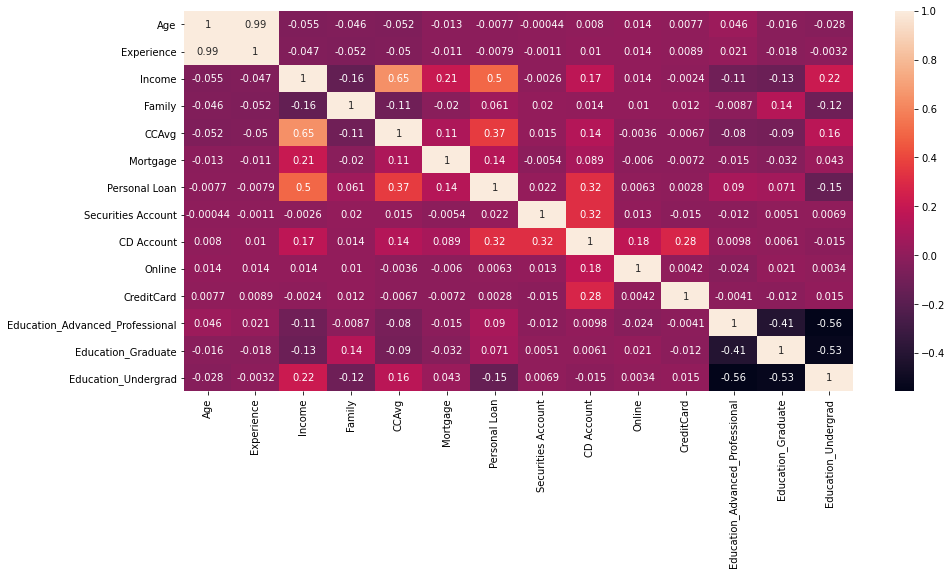

In [41]:
# Now we will check the correlation between variables
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot=True)

In [42]:
# Here we can see in heat map that there is not much strong relation between variables.
# except between "Age" and "Experience".

### Split the Data

In [43]:
# Importing package for splitting data set
from sklearn.model_selection import train_test_split

In [45]:
# Our target variable is "Personal loan" . Hence we save this in y.
y = df["Personal Loan"]

In [46]:
# All other variable store in 'x'.
x = df.drop(["Personal Loan"],axis=1)

In [48]:
x

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
0,25,1.0,49,4,1.6,0,1,0,0,0,0,0,1
1,45,19.0,34,3,1.5,0,1,0,0,0,0,0,1
2,39,15.0,11,1,1.0,0,0,0,0,0,0,0,1
3,35,9.0,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8.0,45,4,1.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3.0,40,1,1.9,0,0,0,1,0,1,0,0
4996,30,4.0,15,4,0.4,85,0,0,1,0,0,0,1
4997,63,39.0,24,2,0.3,0,0,0,0,0,1,0,0
4998,65,40.0,49,3,0.5,0,0,0,1,0,0,1,0


In [49]:
# Splitting the data with 30 % as test data and remaining will be use to train the model. 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [50]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
1334,47,22.0,35,2,1.3,0,0,0,1,0,0,0,1
4768,38,14.0,39,1,2.0,0,0,0,1,0,0,1,0
65,59,35.0,131,1,3.8,0,0,0,1,1,0,0,1
177,29,3.0,65,4,1.8,244,0,0,0,0,0,1,0
4489,39,13.0,21,3,0.2,0,0,0,1,0,0,1,0


# -------------------------- Model Selection ----------------------------------

## 1. Logistic Regression

In [51]:
# For logistic regression importing package
from sklearn.linear_model import LogisticRegression

In [53]:
# Instancing the model
lr_model = LogisticRegression(solver='newton-cg')

In [54]:
# Training the model with trainning data set.
lr_model.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [49]:
# finding the score of traing data set. means how well our model fit with training data set.
lr_model.score(x_train,y_train)

0.9574285714285714

In [55]:
## finding the score of testing data set. means how well our model fit with testing data set. 
lr_model.score(x_test,y_test)

0.96

#### Confusion Matrix for Logistic Regression

In [57]:
# find the predicted values with x_test.
predict = lr_model.predict(x_test)

In [58]:
from sklearn import metrics

<AxesSubplot:>

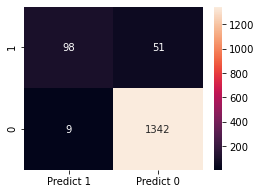

In [59]:
cm_lr = metrics.confusion_matrix(y_test,predict,labels=[1,0])
df_cm_lr = pd.DataFrame(cm_lr,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm_lr,annot=True,fmt='g')

# compared the prected values with actual values. And we can see how many predictions are correct ? 
# and how many predictions are wrong ?

## 2 .KNN Method

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
# Since KNN method uses disatnce between two data point. hence we have to scaled the values of variables
# so that if someone has large value it can not dominate.
from scipy.stats import zscore

In [56]:
# scaling the variables
xscaled = x.apply(zscore) 

In [57]:
x_train,x_test,y_train,y_test= train_test_split(xscaled,y,test_size=0.3,random_state=1)

In [58]:
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced_Professional,Education_Graduate,Education_Undergrad
1334,0.144966,0.164380,-0.842384,-0.345432,-0.365061,-0.555524,-0.341423,-0.25354,0.821951,-0.645314,-0.654965,-0.624538,1.177071
4768,-0.640236,-0.534961,-0.755483,-1.216855,0.035515,-0.555524,-0.341423,-0.25354,0.821951,-0.645314,-0.654965,1.601185,-0.849566
65,1.191902,1.300809,1.243252,-1.216855,1.065567,-0.555524,-0.341423,-0.25354,0.821951,1.549632,-0.654965,-0.624538,1.177071
177,-1.425438,-1.496555,-0.190623,1.397414,-0.078935,1.843604,-0.341423,-0.25354,-1.216618,-0.645314,-0.654965,1.601185,-0.849566
4489,-0.552992,-0.622379,-1.146539,0.525991,-0.994537,-0.555524,-0.341423,-0.25354,0.821951,-0.645314,-0.654965,1.601185,-0.849566


In [59]:
knn_model = KNeighborsClassifier( n_neighbors=5,metric="euclidean")

In [60]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [61]:
knn_model.score(x_train,y_train)

0.9714285714285714

In [62]:
knn_model.score(x_test,y_test)

0.9566666666666667

### -----------------------  Confusion Matrix for KNN -----------------------------------

<AxesSubplot:>

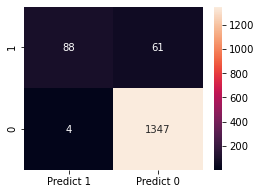

In [63]:
predict = knn_model.predict(x_test)
cm_knn = metrics.confusion_matrix(y_test,predict,labels=[1,0])
df_cm_knn = pd.DataFrame(cm_knn,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm_knn,annot=True,fmt='g')

## 3. SVM  Method

In [64]:
from sklearn import svm

In [65]:
y = df["Personal Loan"]
x = df.drop("Personal Loan",axis=1)

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=1)
# We only used scaled data in KNN

In [67]:
#svm_model = svm.SVC(gamma = .005 ,C = 3,kernel='poly')

In [68]:
#svm_model.fit(x_train,y_train)

In [69]:
#svm_model.score(x_train,y_train)

In [70]:
#svm_model.score(x_test,y_test)

### Confusion matrix for SVM Method

In [71]:
# predict = svm_model.predict(x_test)
# cm_svm = metrics.confusion_matrix(y_test,predict,labels=[1,0])
# df_cm_svm = pd.DataFrame(cm_svm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
# plt.figure(figsize = (4,3))
# sns.heatmap(df_cm_svm,annot=True,fmt='g')

## --------------------------------Decision Tree----------------------------------

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dtree_model = DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=6)

In [74]:
dtree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [75]:
dtree_model.score(x_train,y_train)

0.9928571428571429

In [76]:
dtree_model.score(x_test,y_test)

0.9806666666666667

In [77]:
dtree_model = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=6)
dtree_model.fit(x_train,y_train)
dtree_model.score(x_train,y_train)

0.992

In [78]:
dtree_model.score(x_test,y_test)

0.9806666666666667